In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import operator
train = pd.read_json('/content/drive/MyDrive/SEM3/CGAS/Assignment1/train.json')
test = pd.read_json('/content/drive/MyDrive/SEM3/CGAS/Assignment1/test.json')
# dataset = pd.concat([train,test],axis=0)
# dataset

**Question2 part a**

In [17]:
# Find number of recipes, number of unique ingredients, number of cuisines.
# Number of recipes
print("Number of recipes : ",len(train))

# Number of cuisines
cuisines = train.cuisine.unique()

print("Number of cuisines : ", len(cuisines))

#Number of unique ingredients
# unique_ingredients = (train['ingredients'].explode().value_counts())
unique_ingre = ['garlic']
for lst in train['ingredients']:
  unique_ingre.extend(lst)
# print(len(unique_ingre))
s = set(unique_ingre)
print("Number of ingredients : ",len(s))

Number of recipes :  39774
Number of cuisines :  20
Number of ingredients :  6714


In [18]:
# s

**Question2 part b**


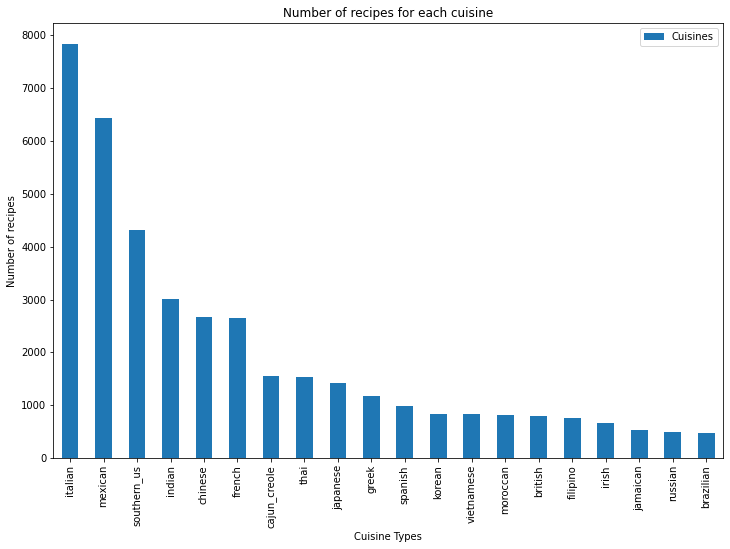

In [19]:
# Plot the statistics (bar plot) of number of recipes for each cuisine.
# fig, ax = plt.subplots()
data = train['cuisine'].explode().value_counts()
cuisines_data = (data.keys())
number_of_recipes = list(data.values)
plt.figure(figsize = (12,8))
data.plot(x = "cuisines_data", y = "number_of_recipes", kind = "bar", label = "Cuisines")
plt.ylabel("Number of recipes")
plt.xlabel("Cuisine Types")
plt.title('Number of recipes for each cuisine')
plt.legend()
plt.show()

**Question 2 part c**

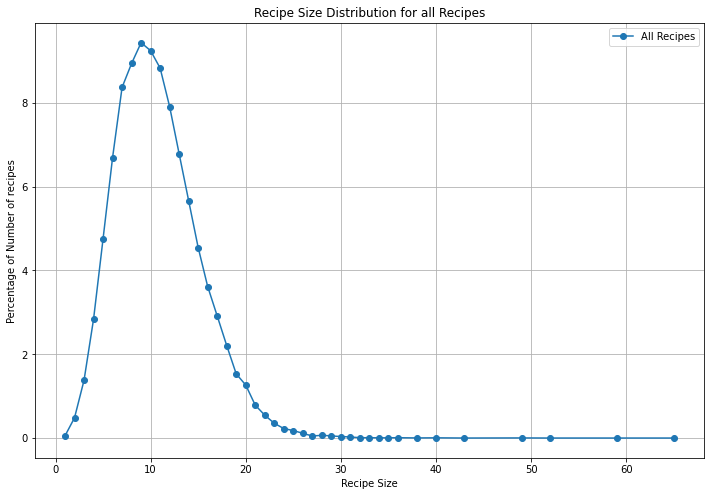

In [20]:
# Plot the recipe size distribution for each cuisine as well as for all the recipes.

count =[]
for lst in train['ingredients']:
  count.append(len(lst))

train['recipe_size'] = count
# unique_counts = (train['recipe_size'].explode().value_counts()).values
train['freq'] = ((train.groupby('recipe_size')['recipe_size'].transform('count'))/(len(train)))*100

# for all recipes
recipe_size_data = pd.Series(train.freq.values,index=train.recipe_size).to_dict()

recipe_size_data_sorted = OrderedDict(sorted(recipe_size_data.items()))
recipe_size = list(recipe_size_data_sorted.keys())
recipe_freq = list(recipe_size_data_sorted.values())
plt.figure(figsize = (12,8))
plt.plot(recipe_size,recipe_freq, marker = 'o' , label = "All Recipes")
plt.ylabel("Percentage of Number of recipes")
plt.xlabel("Recipe Size")
plt.title('Recipe Size Distribution for all Recipes')
plt.legend()
plt.grid()
plt.show()


In [21]:
train

,id,cuisine,ingredients,recipe_size,freq
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,9.435812
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,8.829889
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,7.909690
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,2.836024
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,1.267159
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",12,7.909690
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",7,8.369789
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",12,7.909690
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",21,0.786946


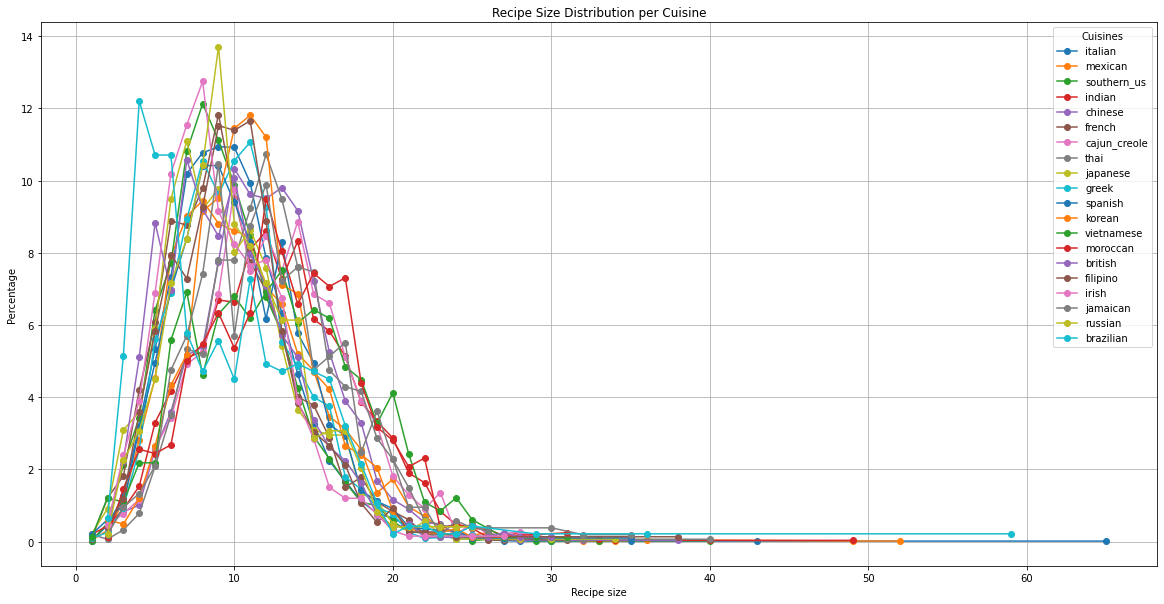

In [22]:
# for each cuisine
plt.figure(figsize = (20,10))
all_cuisines = dict(train['cuisine'].explode().value_counts())

for i in all_cuisines:
  recipe_num_per_cuisine ={ }
  for index, row in train.iterrows():
    if(i ==  row['cuisine']):
        if(row['recipe_size'] in recipe_num_per_cuisine):
          recipe_num_per_cuisine[row['recipe_size']] += 1
        else:
          recipe_num_per_cuisine[row['recipe_size']] = 1

  for k in recipe_num_per_cuisine:
    recipe_num_per_cuisine[k]=(recipe_num_per_cuisine[k]/all_cuisines[i])*100
    recipe_num_per_cuisine = dict(sorted(recipe_num_per_cuisine.items()))
  plt.plot(list(recipe_num_per_cuisine.keys()), list(recipe_num_per_cuisine.values()), label =i, marker = 'o')

  plt.legend(title='Cuisines')
  plt.xlabel('Recipe size')
  plt.ylabel('Percentage')
plt.title('Recipe Size Distribution per Cuisine')
plt.grid()
plt.show()
# print(recipe_num_per_cuisine)


**Question 2 part d**

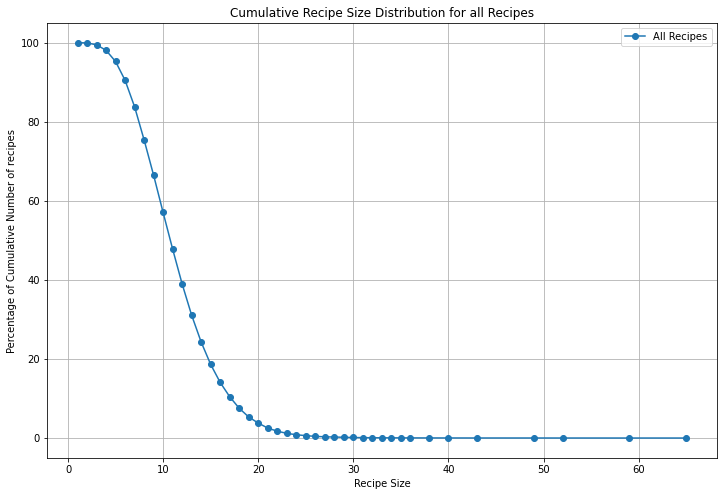

In [23]:
# Plot cumulative distribution of recipe size and interpret.
import operator
sorted_d = dict( sorted(recipe_size_data.items(), key=operator.itemgetter(0),reverse=True))
# print('Dictionary in descending order by key : ',sorted_d)

recipe_size_rev = list(sorted_d.keys())
recipe_freq_rev = list(sorted_d.values())
# print(recipe_size_rev)
# print(recipe_freq_rev)
recipe_freq_cum = []
j=0
for i in range(len(recipe_freq_rev)):
    j+=recipe_freq_rev[i]
    recipe_freq_cum.append(j)
    
plt.figure(figsize = (12,8))
plt.plot(recipe_size_rev,recipe_freq_cum, marker = 'o', label = "All Recipes" )
plt.ylabel("Percentage of Cumulative Number of recipes")
plt.xlabel("Recipe Size")
plt.title('Cumulative Recipe Size Distribution for all Recipes')
plt.legend()
plt.grid()
plt.show()


**Question 3 part a**

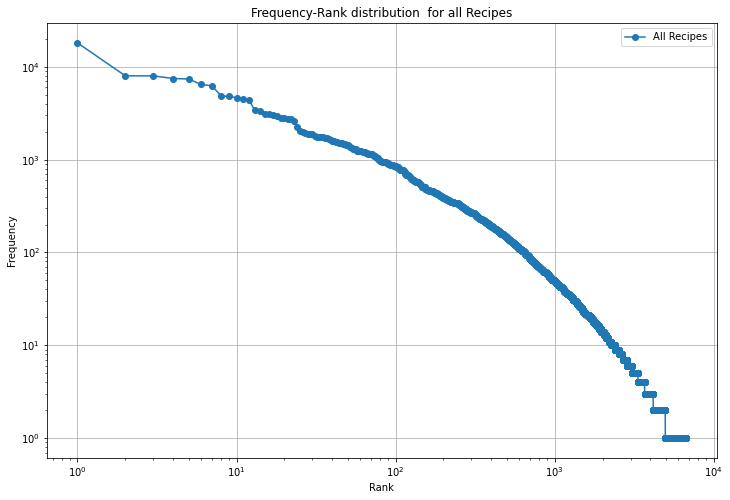

In [24]:
# (a) Plot the frequency-rank distribution for all the recipes and interpret.

recipe_size_for_rank = pd.Series(train.recipe_size.values,index=train.id).to_dict()
# print(len(recipe_size_for_rank))

sorted_for_rank = dict( sorted(recipe_size_for_rank.items(), key=operator.itemgetter(1),reverse=True))
recipe_size_for_rank = list(sorted_for_rank.values())
recipe_id_for_rank = list(sorted_for_rank.keys())



total_ingre =[]
for lst in train['ingredients']:
  total_ingre.extend(lst)
values, counts = np.unique(total_ingre, return_counts=True)
# print(type(counts))
# print(values, counts)
sorted_count = np.sort(counts)[::-1]
rank =1
rank_lst = []
for i in range(sorted_count.shape[0]):
  rank_lst.append(rank)
  rank = rank+1

plt.figure(figsize = (12,8))
plt.loglog(rank_lst,sorted_count, marker = 'o',label ="All Recipes" )
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.title('Frequency-Rank distribution  for all Recipes')
plt.legend()
plt.grid()
plt.show()


**Question 3 part b**

In [25]:
# List the 10 most popular ingredients in the recipes.

popular_ingredients = { }

for A, B in zip(values, counts):
    popular_ingredients[A] = B

popular_ingredients_sorted = dict( sorted(popular_ingredients.items(), key=operator.itemgetter(1),reverse=True))
# print(popular_ingredients_sorted)
# first_ten = list(popular_ingredients_sorted)[:10]
# print(first_ten)
print("Top 10 Ingredients : ")
pairs_iterator = iter(popular_ingredients_sorted.items())
for i in range(0, 10):
  first_pair = next(pairs_iterator)
  print(first_pair)



Top 10 Ingredients : 
('salt', 18049)
('olive oil', 7972)
('onions', 7972)
('water', 7457)
('garlic', 7380)
('sugar', 6434)
('garlic cloves', 6237)
('butter', 4848)
('ground black pepper', 4785)
('all-purpose flour', 4632)


**Question 3 part c**

most popular ingredient  1 for cuisine italian  is :  ('salt', 3454)
most popular ingredient  2 for cuisine italian  is :  ('olive oil', 3111)
most popular ingredient  3 for cuisine italian  is :  ('garlic cloves', 1619)
most popular ingredient  4 for cuisine italian  is :  ('grated parmesan cheese', 1580)
most popular ingredient  5 for cuisine italian  is :  ('garlic', 1471)
most popular ingredient  6 for cuisine italian  is :  ('ground black pepper', 1444)
most popular ingredient  7 for cuisine italian  is :  ('extra-virgin olive oil', 1362)
most popular ingredient  8 for cuisine italian  is :  ('onions', 1240)
most popular ingredient  9 for cuisine italian  is :  ('water', 1052)
most popular ingredient  10 for cuisine italian  is :  ('butter', 1030)


most popular ingredient  1 for cuisine mexican  is :  ('salt', 2720)
most popular ingredient  2 for cuisine mexican  is :  ('onions', 1493)
most popular ingredient  3 for cuisine mexican  is :  ('ground cumin', 1346)
most popular ingre

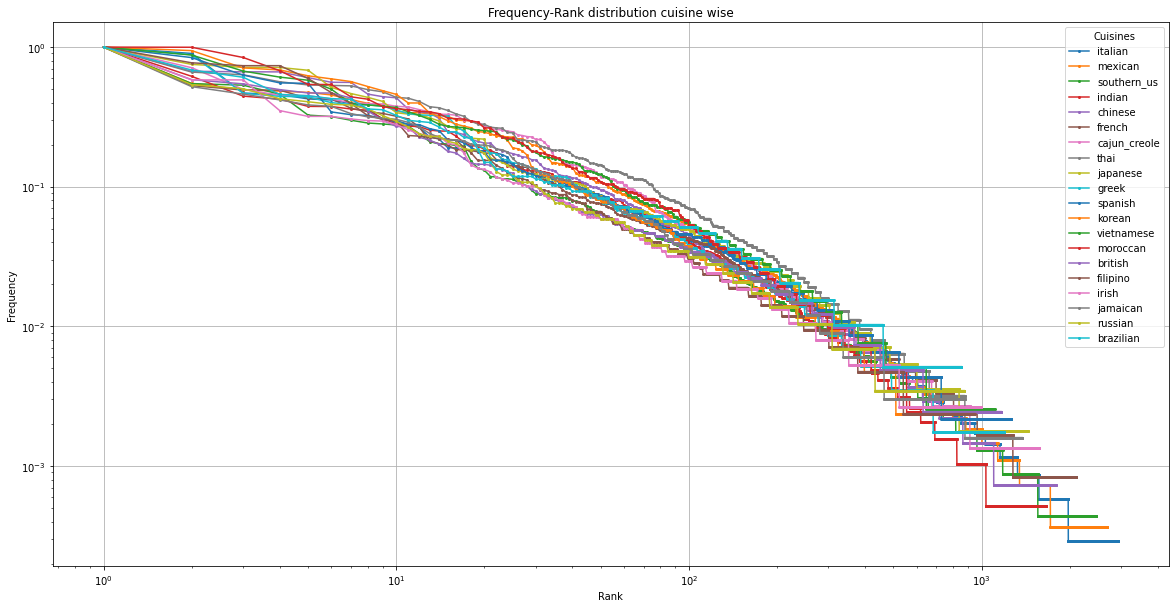

In [29]:
# Plot the ingredient-rank distribution for each of the cuisines and list the most popular ingredients for each cuisine.
plt.figure(figsize = (20,10))
for cu in all_cuisines:
  recipe_num_per_cuisine ={ }
  total_ingre_cuisine =[]
  for index, row in train.iterrows():
    if(cu ==  row['cuisine']):
      
      total_ingre_cuisine.extend(row['ingredients'])

  values, counts = np.unique(total_ingre_cuisine, return_counts=True)
  sorted_count = np.sort(counts)[::-1]
  normalised_sorted_count = sorted_count/sorted_count[0]
  rank =1
  rank_lst = []
  for i in range(sorted_count.shape[0]):
    rank_lst.append(rank)
    rank = rank+1

  for A, B in zip(values, counts):
    popular_ingredients[A] = B

  popular_ingredients_sorted = dict( sorted(popular_ingredients.items(), key=operator.itemgetter(1),reverse=True))
  pairs_iterator = iter(popular_ingredients_sorted.items())
  # print("Number of ingredients used in ", cu , "cuisine are : ", len(popular_ingredients_sorted) )
  for i in range(0, 10):
    first_pair = next(pairs_iterator)
    print("most popular ingredient ", i+1 , "for cuisine" , cu , " is : ",first_pair)
  print("\n")

  plt.loglog(rank_lst,normalised_sorted_count, marker = 'o', label = cu, markersize = 2 )
  # plt.plot(rank_lst,sorted_count)
plt.legend(title = 'Cuisines')

plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Rank")
plt.title('Frequency-Rank distribution cuisine wise')

plt.show()


In [30]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/SEM3/CGAS/Assignment1/CGAS_A1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/SEM3/CGAS/Assignment1/CGAS_A1.ipynb to html
[NbConvertApp] Writing 828418 bytes to /content/drive/MyDrive/SEM3/CGAS/Assignment1/CGAS_A1.html
